### Problem Statement: Predicting players rating - to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

#### About the Dataset
The ultimate Soccer database for data analysis and
machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team
formations, with player names and a pair of coordinates to indicate their position on the pitch.
- 25,000 matches
- 10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016 
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates) 
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA
video games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

In [1]:
#Importing the necessary libraries

import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
# Create your connection.

cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql('SELECT * FROM Player_Attributes', cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


#### Exploring the data

In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

((183978, 42), None)

In [4]:
# Checking for any missing values

df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [6]:
df.nunique()

id                     183978
player_fifa_api_id      11062
player_api_id           11060
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
defensive_work_rate        19
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions              96
positioning                95
vision                     97
penalties 

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve            

In [8]:
df = df.drop(["id", "player_fifa_api_id", "player_api_id", "date"], axis = 1)

#Check whether there are duplicates entries present or not
df.duplicated().any()

True

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(136284, 38)

In [11]:
df.isnull().values.sum()

0

In [13]:
# functions to handle missing data
def data_preprocessing(df):
    df.convert_dtypes()
    df.fillna(-99999, inplace=True)     
    return df

#call function to hanbdle missing data
data_preprocessing(df)

#check number of missing parameters in the DataFrame - Columnwise after handling missing data (should be 0)
df.isnull().values.sum()

0

In [14]:
#Visualize column overall rating of the dataframe

vis_df = df['overall_rating'].value_counts().plot(kind='bar',figsize=(20,10))
vis_df

In [16]:
df = pd.get_dummies(df)
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0
5,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,0,0,0,0,0,0,1,0,0,0
6,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
#Split dataframe into df_x and df_y
import numpy as np

df_x = df.drop(['overall_rating'], axis = 1)
df_y = np.array(df['overall_rating'])

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [20]:
#Use RandomForestRegressor to check feature_importances

rfc_1 = RandomForestRegressor(random_state=10)
rfc_1.fit(df_x, df_y)

feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc_1.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

In [21]:
#print the top 40 important features
print(feature_importances[:40])

                            importance
feature                               
reactions                       0.4807
potential                       0.2409
ball_control                    0.0562
standing_tackle                 0.0456
gk_diving                       0.0213
gk_positioning                  0.0173
heading_accuracy                0.0151
positioning                     0.0108
strength                        0.0097
crossing                        0.0093
marking                         0.0085
finishing                       0.0084
dribbling                       0.0079
shot_power                      0.0074
interceptions                   0.0070
gk_handling                     0.0057
short_passing                   0.0043
stamina                         0.0040
gk_reflexes                     0.0040
aggression                      0.0038
long_shots                      0.0033
long_passing                    0.0029
sprint_speed                    0.0027
sliding_tackle           

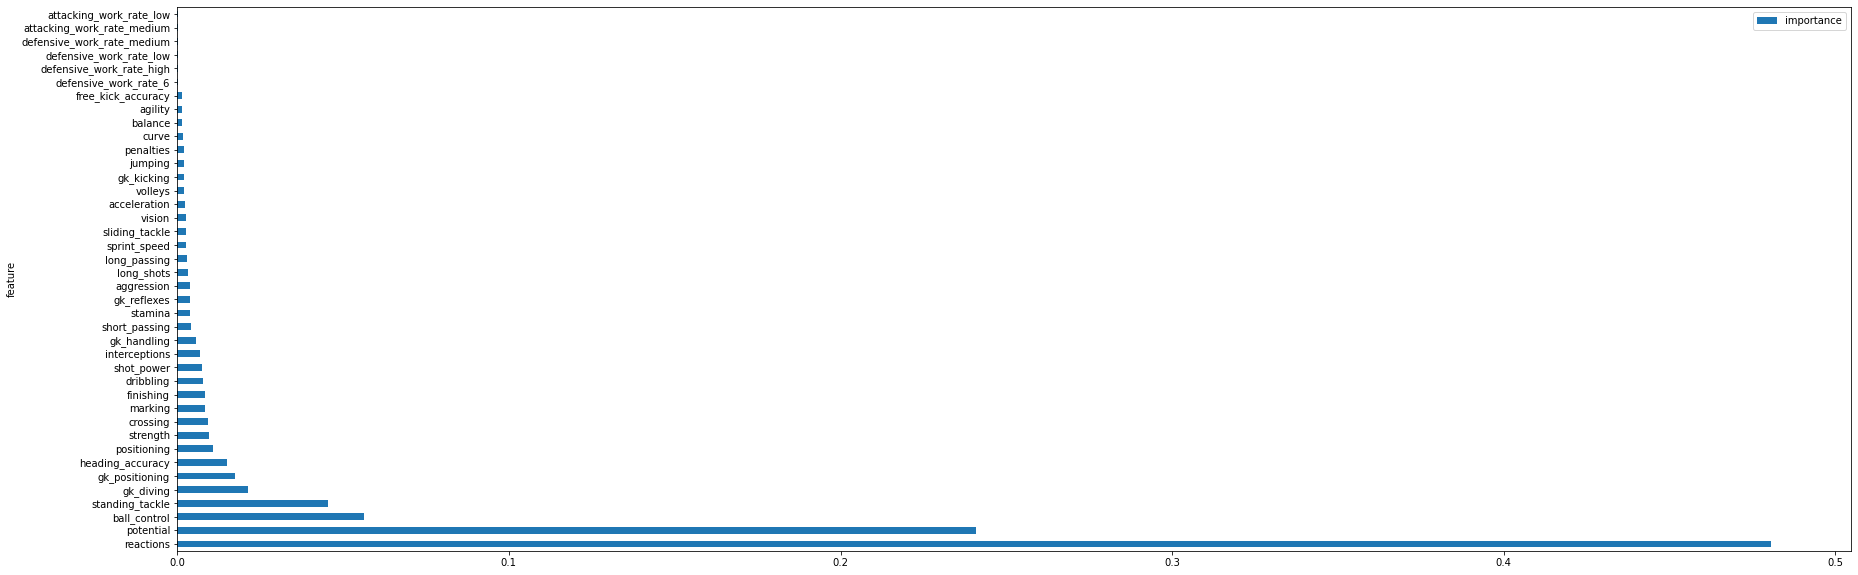

In [22]:
#Visualize top 40 features of the dataframe
feature_importances[:40].plot(kind='barh',figsize=(30,10))

Since features more than 40 are not so important so we will consider only 40 features for further preprocessing of the data

#### Create dataset for train, test and cross-validation

In [23]:
x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=0.2,train_size=0.8, random_state = 55)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.20,train_size =0.80, random_state = 55)

#### Apply scaling on X data

In [24]:
from sklearn.preprocessing import StandardScaler, Normalizer, scale
df_x1 = scale(x_train)

#### Perfroming PCA (dimensionality reduction technique) on scaled dataframe 

In [27]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
# on non-standardized data

pca = PCA(n_components=20).fit(x_train)

In [28]:
pca.explained_variance_ratio_

array([0.47180105, 0.21753658, 0.07188958, 0.04203335, 0.030222  ,
       0.02053833, 0.01253976, 0.01243855, 0.01094015, 0.00955341,
       0.00929964, 0.00870098, 0.00740788, 0.00724296, 0.00687537,
       0.00587329, 0.00554533, 0.0051974 , 0.00486981, 0.00467286])

In [29]:
from sklearn.decomposition import PCA

# on non-standardized data
df_x2 = pca.transform(x_train)

In [30]:
#### Mapping test and cross-validation data using PCA

pca.transform(x_test)

array([[-2.37804805e+01, -5.25865541e+01, -2.20267807e+01, ...,
         7.36897528e+00,  7.33657766e+00, -5.73827245e+00],
       [ 2.46885154e+01,  4.87168652e+01, -2.16582202e+01, ...,
        -1.25231391e+01, -6.93621687e-02,  5.19203946e+00],
       [-7.81382518e+01,  2.18516725e+01,  2.36303947e+01, ...,
        -1.70521240e+00, -1.68224474e+00,  6.61233507e+00],
       ...,
       [ 1.75434444e+02, -2.35110492e+01,  3.49508224e+01, ...,
         3.32810149e+00,  1.15611714e+00,  2.58854991e+00],
       [-5.20184095e+01,  5.46209592e+01,  1.33731770e+01, ...,
         7.38961137e+00, -2.66885409e-01, -2.14441914e+00],
       [-9.33777306e+01, -3.38856605e+00,  4.03062963e+01, ...,
        -8.25020444e+00, -1.90549799e+00, -3.47051275e-01]])

In [31]:
pca.transform(x_cv)

array([[-30.25968695,  -4.14015177, -15.2365756 , ...,   4.44058015,
          6.73273874, -22.10318286],
       [197.24372933, -26.37429911,  17.41110788, ...,  13.54120176,
         -9.3344801 ,  -8.76958382],
       [  6.6305754 ,  47.95958769, -14.85683144, ...,   4.97879097,
          4.90141813,   6.79973931],
       ...,
       [ 30.2017582 ,  86.22811175, -20.75911576, ...,  17.91140873,
          4.65148311,   4.80164119],
       [-26.29829691, -59.76631814, -17.32072474, ...,  -2.23782398,
         -4.92975071,   3.70621276],
       [-51.79619495, -84.1348421 ,  -4.62018609, ...,   1.69876622,
          1.95906063,   0.63767201]])

### Applying different models - Linear Regression, Decision Tree, XgBoost and Random Forest


In [32]:
#Apply linear regression model on the dataset
lr1 = LinearRegression()
lr = RFE(lr1, 20)
lr.fit(x_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [33]:
#Perform prediction using Linear Regression Model
Y_pred = lr.predict(x_test)
Y_pred

array([72.14435665, 61.84959837, 74.68545006, ..., 77.7129406 ,
       78.80690735, 81.09267068])

In [34]:
print("Variance score of the Linear Regression Model is: ", lr.score(x_test,y_test))

Variance score of the Linear Regression Model is:  0.8148314085457732


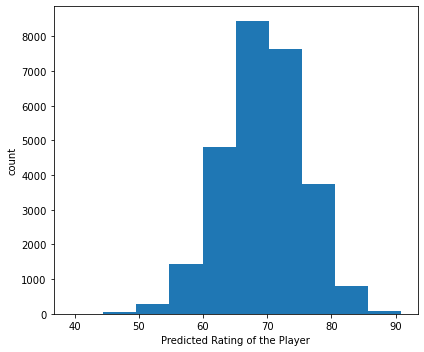

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.hist(Y_pred)
plt.xlabel("Predicted Rating of the Player")
plt.ylabel("count")
plt.tight_layout()

Text(0.5, 1.0, 'Actual vs Predicted Rating for Linear Regression Model')

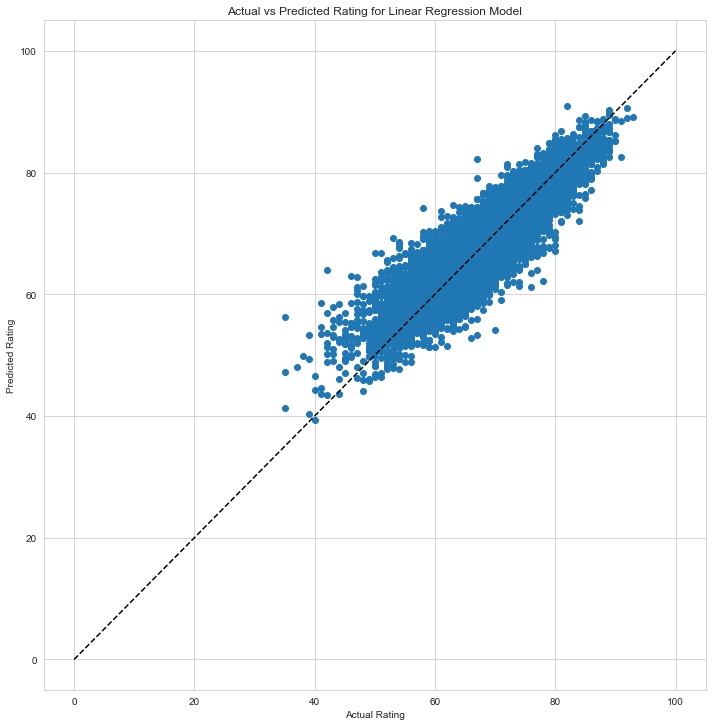

In [36]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred)
plt.plot([0,100],[0,100],'--k')
plt.axis('tight')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Rating for Linear Regression Model")

In [37]:
#Apply decision tree model on the dataset
d_tree = DecisionTreeRegressor(min_samples_split=10, random_state=55)
d_tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=55, splitter='best')

In [39]:
Y_pred1 = d_tree.predict(x_test)
Y_pred1

array([73.5 , 65.75, 74.  , ..., 71.  , 77.8 , 82.  ])

In [40]:
print("Variance score of the Decision Tree Regressor Model is: ", d_tree.score(x_test,y_test))

Variance score of the Decision Tree Regressor Model is:  0.9335450442207979


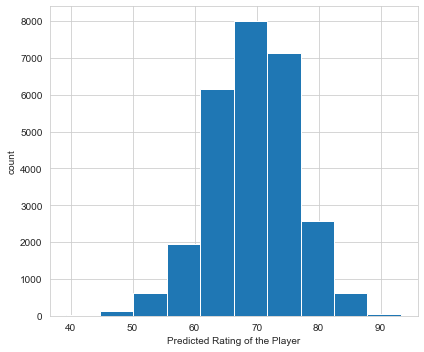

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.hist(Y_pred1)
plt.xlabel("Predicted Rating of the Player")
plt.ylabel("count")
plt.tight_layout()

Text(0.5, 1.0, 'Actual vs Predicted Rating for Decision Tree Regressor Model')

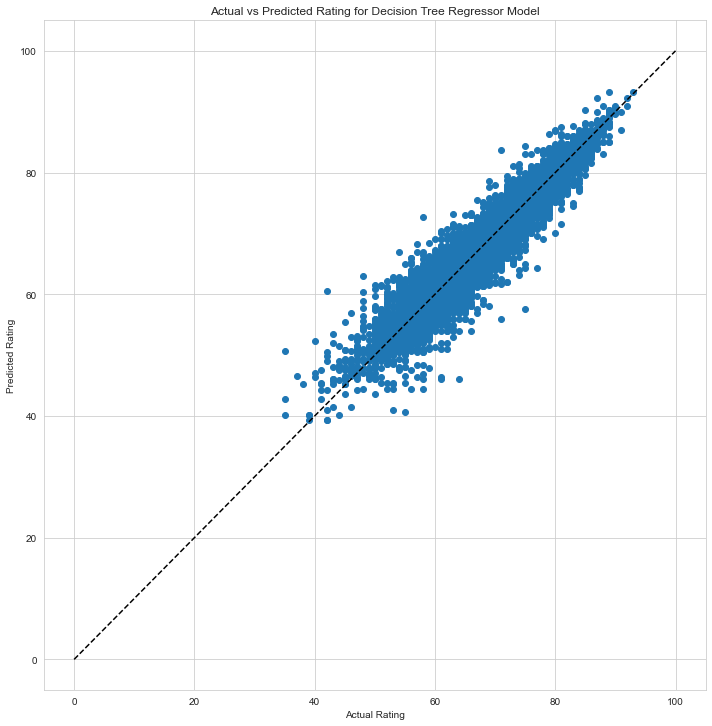

In [70]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred1)
plt.plot([0,100],[0,100],'--k')
plt.axis('tight')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Rating for Decision Tree Regressor Model")

In [43]:
#Mean of the expected target value in test set
y_test.mean()

69.33870198481124

In [44]:
#Mean of the predicted target value in test set
Y_pred1.mean()

69.35012644196247

In [45]:
#Apply Random Forest model on the dataset
rfc = RandomForestRegressor(random_state=99)
rfc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=99, verbose=0, warm_start=False)

In [46]:
Y_pred2 = rfc.predict(x_test)
Y_pred2

array([73.96, 62.11, 74.  , ..., 70.  , 78.17, 82.03])

In [47]:
print("Variance score of the Random Forest Regressor Model is: ", rfc.score(x_test,y_test))

Variance score of the Random Forest Regressor Model is:  0.9703612646762337


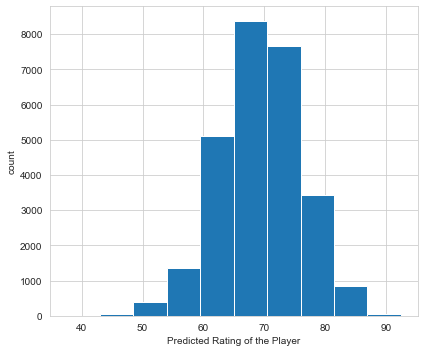

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.hist(Y_pred2)
plt.xlabel("Predicted Rating of the Player")
plt.ylabel("count")
plt.tight_layout()

Text(0.5, 1.0, 'Actual vs Predicted Rating for Random Forest Regressor Model')

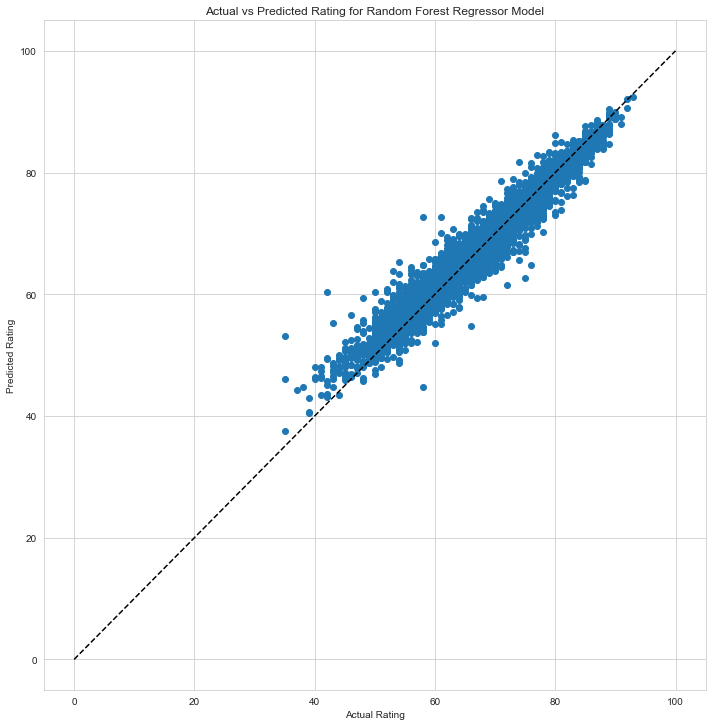

In [71]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred2)
plt.plot([0,100],[0,100],'--k')
plt.axis('tight')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Rating for Random Forest Regressor Model")

In [51]:
# Apply xgboost model on the dataset
import xgboost as xgb
xg = xgb.XGBRegressor(n_estimators=200,learning_rate=1)
xg.fit(x_train,y_train)

c:\users\leo26\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
c:\users\leo26\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
c:\users\leo26\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
Y_pred3 = xg.predict(x_test)
Y_pred3

array([73.48247 , 61.48839 , 73.98329 , ..., 71.12002 , 79.148285,
       80.01712 ], dtype=float32)

In [53]:
print("Variance score of the XgBoost Model is: ", xg.score(x_test,y_test))

Variance score of the XgBoost Model is:  0.9498876999131501


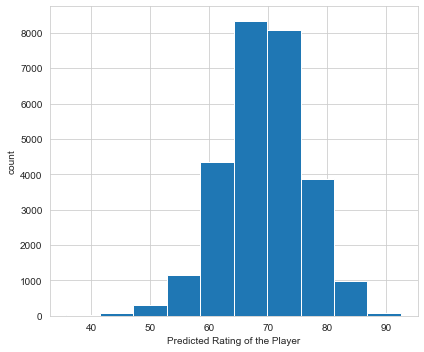

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.hist(Y_pred3)
plt.xlabel("Predicted Rating of the Player")
plt.ylabel("count")
plt.tight_layout()

Text(0.5, 1.0, 'Actual vs Predicted Rating forXgboost Model')

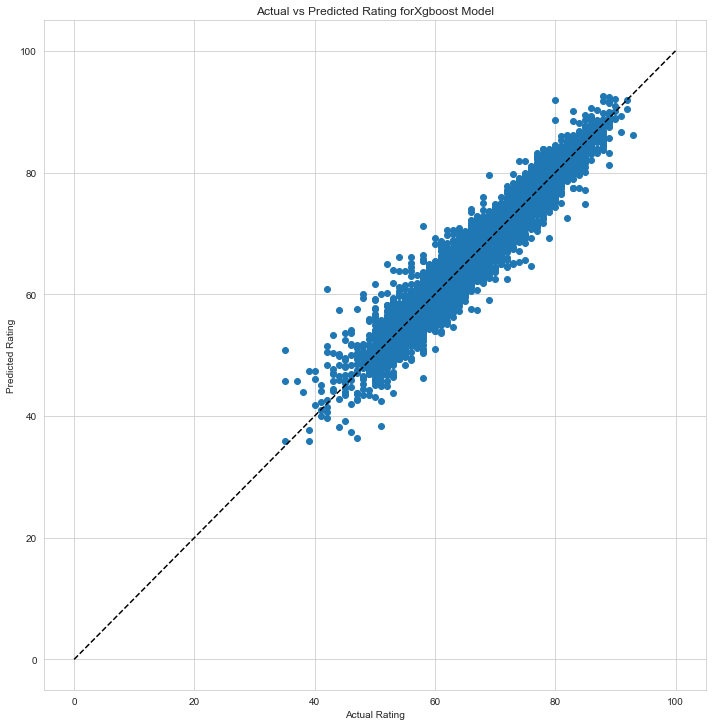

In [72]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred3)
plt.plot([0,100],[0,100],'--k')
plt.axis('tight')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Rating forXgboost Model")

#### Analyzing mse(mean squared error) and accuracy

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score

models = pd.DataFrame(index=['train_mse','cv_mse','test_mse','accuracy_score'], columns=['linear_regression','decision_tree','random_forest','xgboost'])

In [63]:
models.loc['train_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_train), y_true=y_train)
models.loc['cv_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_cv), y_true=y_cv)
models.loc['test_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_test), y_true=y_test)
models.loc['accuracy_score','linear_regression'] = accuracy_score(y_pred=lr.predict(x_test).round(), y_true=y_test)

In [64]:
models.loc['train_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_train), y_true=y_train)
models.loc['cv_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_cv), y_true=y_cv)
models.loc['test_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_test), y_true=y_test)
models.loc['accuracy_score','decision_tree'] = accuracy_score(y_pred=d_tree.predict(x_test).round(), y_true=y_test)

In [66]:
models.loc['train_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_train), y_true=y_train)
models.loc['cv_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_cv), y_true=y_cv)
models.loc['test_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_test), y_true=y_test)
models.loc['accuracy_score','random_forest'] = accuracy_score(y_pred=rfc.predict(x_test).round(), y_true=y_test)

In [68]:
models.loc['train_mse','xgboost'] = mean_squared_error(y_pred=xg.predict(x_train), y_true=y_train)
models.loc['cv_mse','xgboost'] = mean_squared_error(y_pred=xg.predict(x_cv), y_true=y_cv)
models.loc['test_mse','xgboost'] = mean_squared_error(y_pred=xg.predict(x_test), y_true=y_test)
models.loc['accuracy_score','xgboost'] = accuracy_score(y_pred=xg.predict(x_test).round(), y_true=y_test)

In [69]:
models

,linear_regression,decision_tree,random_forest,xgboost
train_mse,8.69407,0.403598,0.212149,0.730855
cv_mse,8.53452,3.03753,1.33792,2.35624
test_mse,8.7351,3.13493,1.39817,2.36399
accuracy_score,0.15097,0.449352,0.55406,0.34028


Random forest has the highest accuracy score and lowest mean squared error. Random forest is the best model to predict players rating. 